In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Método Analítico


In [2]:
k = 1.54*10**-10 #Na equação -k, logo o valor de k>0
cte_int = 3.5
massa = np.array([]) #valores de y
tempo = np.array([]) #valores de x

In [3]:
#Função range:
#Inicia-se em tempo = 0 (Valor includente)
#Passo = 0.1
#Fim = 90 (Valor excludente).
#Logo, o último valor será: 90-1  = 89
for i in range(0,90):
    valores_x = i/10
    tempo = np.append(tempo,valores_x)
    

In [4]:
# Printando o valor do tempo
tempo

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

In [5]:
#Solução analítica: 
#Como tempo está em array, teremos valores mássicos em array:
for i in range(0,90):
    y_analitico = np.exp(-k*tempo[i]*10**9)*cte_int
    massa = np.append(massa,y_analitico)

In [6]:
#Dados:
print("Y:Massa -",massa)
print("\n")
print("X:Tempo -",tempo)


Y:Massa - [3.5        3.44651291 3.39384321 3.34197841 3.2909062  3.24061449
 3.19109133 3.14232499 3.0943039  3.04701666 3.00045207 2.95459909
 2.90944682 2.86498458 2.82120181 2.77808813 2.73563332 2.69382729
 2.65266015 2.61212213 2.57220361 2.53289513 2.49418736 2.45607112
 2.41853738 2.38157723 2.3451819  2.30934277 2.27405133 2.23929922
 2.20507819 2.17138013 2.13819704 2.10552105 2.07334443 2.04165952
 2.01045883 1.97973494 1.94948058 1.91968857 1.89035184 1.86146343
 1.8330165  1.80500429 1.77742017 1.75025758 1.7235101  1.69717138
 1.67123516 1.6456953  1.62054574 1.59578052 1.57139376 1.54737968
 1.52373258 1.50044686 1.47751699 1.45493754 1.43270314 1.41080853
 1.38924852 1.36801799 1.3471119  1.3265253  1.30625331 1.28629111
 1.26663397 1.24727724 1.22821632 1.20944668 1.19096389 1.17276355
 1.15484134 1.13719303 1.11981441 1.10270138 1.08584987 1.06925588
 1.05291548 1.0368248  1.02098002 1.00537737 0.99001317 0.97488376
 0.95998556 0.94531504 0.93086871 0.91664315 0.90263

In [7]:
#Criando um dicionário com os valores de tempo e massa para posteriormente gerar um DataFrame:
data = {"X:Tempo(t)":tempo,"Y:Massa(N)":massa}
type(data)

dict

In [8]:
#Da biblioteca Pandas iremos importar o DataFrame:

from pandas import DataFrame
frame = DataFrame(data)
frame


,X:Tempo(t),Y:Massa(N)
0,0.0,3.500000
1,0.1,3.446513
2,0.2,3.393843
3,0.3,3.341978
4,0.4,3.290906
...,...,...
85,8.5,0.945315
86,8.6,0.930869
87,8.7,0.916643
88,8.8,0.902635


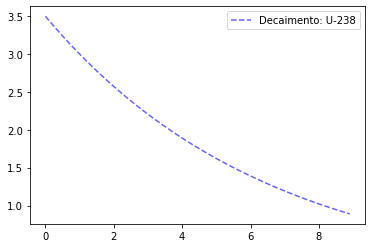

In [9]:
#fig, ax = plt.subplots(figsize=(8,8))
plt.plot(tempo,massa,'b-',markersize=6, alpha = 0.6,linestyle='dashed',label='Decaimento: U-238')
#plt.plot(massa[3],'ro',markersize=6,label = 'Primeiro Decaimento')
#ax.annotate = (' ({} , {})'.format(tempo[3],massa[3]), xy = (tempo[3],massa[3]))
#ax.annotate('   ( {} , {} )'.format(x_meia_vida,y_meia_vida),xy =(x_meia_vida,y_meia_vida))


plt.legend()
plt.show()

# Método das Diferenças Finitas Centradas

In [10]:
#Dados fornecidos: 
#N = 3.5 kg em t = 0
#N = 1.75 kg em t = 4.5*10^9
#Passo(h) = 0.1

In [11]:
N_numerica = np.array([3.5])
t_numerica = np.array([0])
h = 0.1*10**9

In [12]:
#Função range é excludente para o último número. Logo, o último valor utilizado será '89'
for i in range(1,90):
    passo = i/10
    t_numerica = np.append(t_numerica,passo)
    
t_numerica 

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

In [13]:
#Calculando: Y1 = Y0*h*f(X0,Y0)
Y = N_numerica[0]+h*(-k*N_numerica[0])
N_numerica = np.append(N_numerica,Y)
N_numerica

array([3.5   , 3.4461])

In [14]:
for i in range(1,89):
    Y = N_numerica[i-1]+2*h*(-k*N_numerica[i])
    N_numerica = np.append(N_numerica,Y)

In [15]:
N_numerica

array([3.5       , 3.4461    , 3.39386012, 3.34156911, 3.29093979,
       3.24020816, 3.19114138, 3.14192101, 3.09437021, 3.04661441,
       3.00053449, 2.95419794, 2.90954519, 2.86458395, 2.82131601,
       2.77768742, 2.73576323, 2.69342591, 2.65280572, 2.61171949,
       2.57236476, 2.53249066, 2.49436404, 2.45566425, 2.41872958,
       2.38116738, 2.34538963, 2.30892938, 2.2742746 , 2.23888172,
       2.20531705, 2.17095795, 2.13845154, 2.10509365, 2.07361466,
       2.04122631, 2.01074489, 1.97929537, 1.94978259, 1.91924207,
       1.89066994, 1.86100943, 1.83335084, 1.80454223, 1.77777094,
       1.74978688, 1.72387751, 1.69669146, 1.67161941, 1.64520558,
       1.62094708, 1.59528041, 1.57181244, 1.54686858, 1.52416889,
       1.49992418, 1.47797123, 1.45440267, 1.43317562, 1.41026086,
       1.38973959, 1.36745688, 1.34762192, 1.32595013, 1.30678265,
       1.28570122, 1.26718306, 1.24667198, 1.22878556, 1.20882539,
       1.19155374, 1.17212553, 1.15545227, 1.1365376 , 1.12044

In [16]:
y_meia_vida = round(1.80454223 +2*h*(-k*1.77777094),2)
y_meia_vida
x_meia_vida =4.5

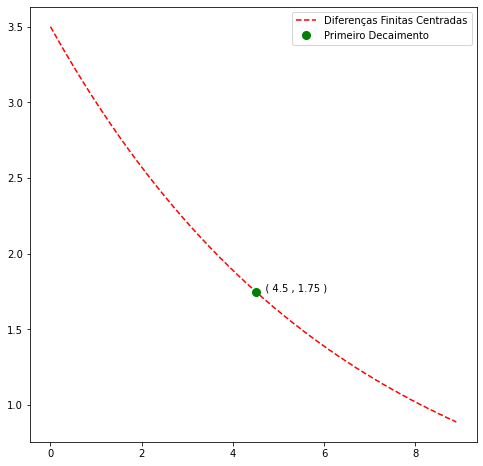

In [17]:
fig,ax = plt.subplots(figsize=(8,8))

plt.plot(t_numerica,N_numerica,'r-',alpha =1,linestyle = 'dashed',label='Diferenças Finitas Centradas')
plt.plot(x_meia_vida,y_meia_vida,'go',markersize =8,label='Primeiro Decaimento')
plt.legend()
ax.annotate('   ( {} , {} )'.format(x_meia_vida,y_meia_vida),xy =(x_meia_vida,y_meia_vida))
            
plt.show()

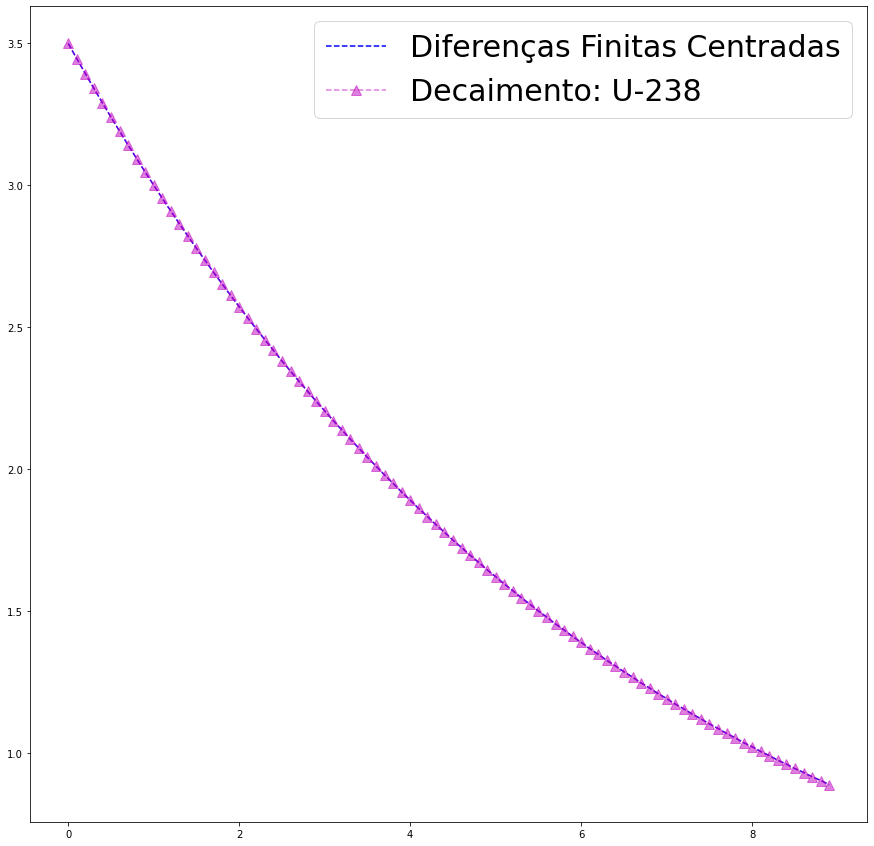

In [18]:
#Comparação entre o Método Analítico e o Método das Diferenças Finitas Centradas: 
fig,ax = plt.subplots(figsize=(15,15))

#Método das Diferenças Finitas Centradas:
plt.plot(t_numerica,N_numerica,'b-',markersize = 10, alpha =1,linestyle = 'dashed',label='Diferenças Finitas Centradas')
#Método Analítico:
plt.plot(tempo,massa,'m^',markersize=10, alpha = 0.5,linestyle='dashed',label='Decaimento: U-238')

plt.legend(fontsize=30)
plt.show()

# Método de Euler

In [19]:
N_euler = np.array([3.5])
t_euler= np.array([0])
h = 0.1*10**9

In [20]:
#Função range é excludente para o último número, neste caso: Exclui '11'
for i in range(1,90):
    passo = i/10
    t_euler = np.append(t_euler,passo)
    


In [21]:
t_euler

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

In [22]:
for i in range(0,89):
    Y = N_euler[i]+h*(-k*N_euler[i])
    N_euler = np.append(N_euler,Y)
    
N_euler

array([3.5       , 3.4461    , 3.39303006, 3.3407774 , 3.28932943,
       3.23867375, 3.18879818, 3.13969068, 3.09133945, 3.04373282,
       2.99685933, 2.9507077 , 2.9052668 , 2.86052569, 2.8164736 ,
       2.7730999 , 2.73039417, 2.6883461 , 2.64694557, 2.6061826 ,
       2.56604739, 2.52653026, 2.4876217 , 2.44931232, 2.41159291,
       2.37445438, 2.33788778, 2.30188431, 2.26643529, 2.23153219,
       2.19716659, 2.16333023, 2.13001494, 2.09721271, 2.06491564,
       2.03311594, 2.00180595, 1.97097814, 1.94062508, 1.91073945,
       1.88131406, 1.85234183, 1.82381576, 1.795729  , 1.76807477,
       1.74084642, 1.71403739, 1.68764121, 1.66165154, 1.6360621 ,
       1.61086675, 1.5860594 , 1.56163408, 1.53758492, 1.51390611,
       1.49059196, 1.46763684, 1.44503523, 1.42278169, 1.40087085,
       1.37929744, 1.35805626, 1.33714219, 1.3165502 , 1.29627533,
       1.27631269, 1.25665748, 1.23730495, 1.21825045, 1.1994894 ,
       1.18101726, 1.16282959, 1.14492202, 1.12729022, 1.10992

# Comparação gráfica entre ME, MDFC, MA

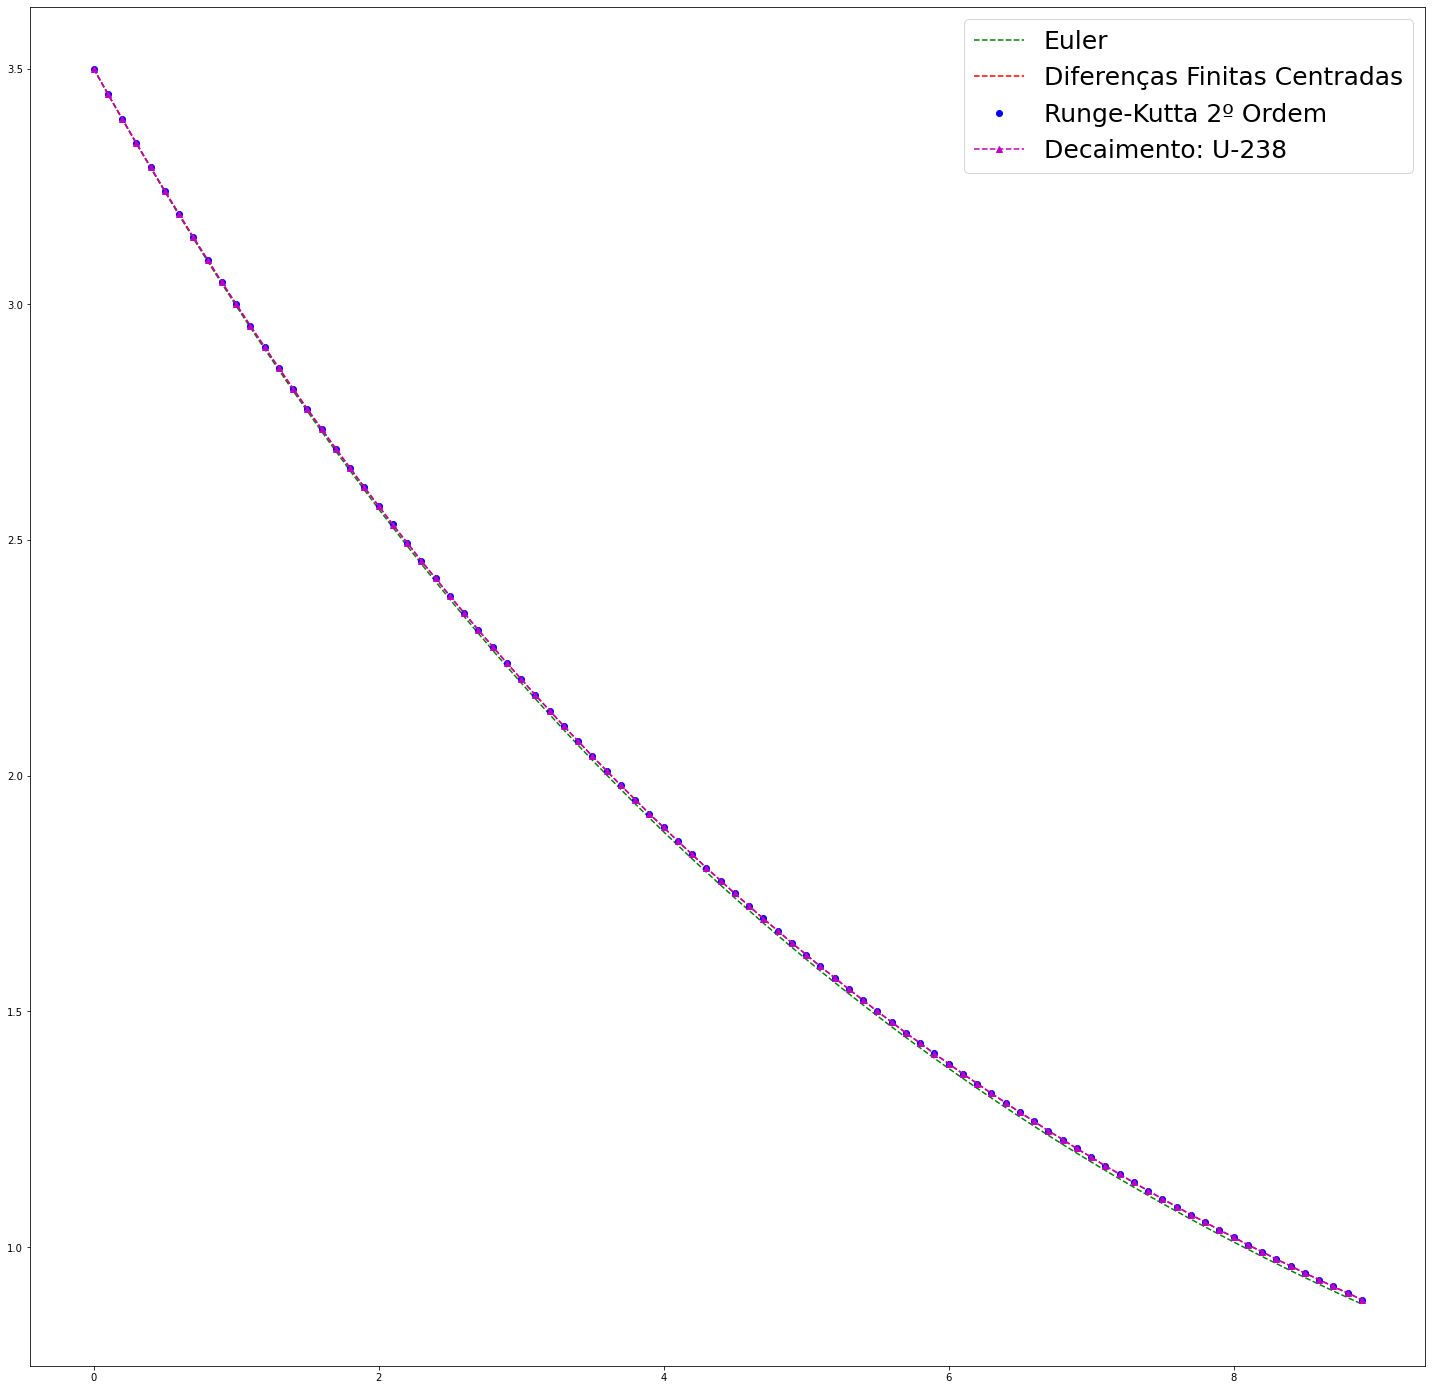

In [74]:
fig,ax = plt.subplots(figsize=(25,25))
plt.plot(t_euler,N_euler,'g-',alpha=1,linestyle='dashed',label='Euler')
plt.plot(t_numerica,N_numerica,'r-',alpha =1,linestyle = 'dashed',label='Diferenças Finitas Centradas')
plt.plot(tempo_rk,massa_rk,'bo', label = 'Runge-Kutta 2º Ordem')
#Ajustando valores analíticos
plt.plot(tempo,massa,'m^',markersize=6, alpha = 1,linestyle='dashed',label='Decaimento: U-238')
plt.legend(fontsize=25)
plt.show()

# Método de Ruge-Kutta de 2º ordem

In [24]:
tempo_rk = np.array([0])
massa_rk = np.array([3.5])
massa_rk_o =3.5
h_rk = 0.1*10**9

In [25]:
for i in range(1,90):
    passo = i/10
    tempo_rk = np.append(tempo_rk,passo)


In [26]:
tempo_rk

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

In [27]:
for i in range(1,90):
    k1 = -1.54*10**-10*massa_rk_o
    k2 = massa_rk_o*-1.54*10**-10 + h_rk*k1*-1.54*10**-10
    y = massa_rk_o + 0.5*(k1+k2)*h
    massa_rk_o = y
    massa_rk = np.append(massa_rk,massa_rk_o)
    
#Pelo modo da apresentação do professor:
#y = 3.5*((1-1.54*10**-10*h)+((h**2)/2)*(-1.54*10**-10)**2)**i
#massa_rk = np.append(massa_rk,y)
    
    
    
    
    


In [28]:
massa_rk

array([3.5       , 3.44651503, 3.39384739, 3.34198458, 3.29091431,
       3.24062447, 3.19110312, 3.14233853, 3.09431914, 3.04703355,
       3.00047055, 2.9546191 , 2.90946832, 2.86500752, 2.82122613,
       2.77811379, 2.73566027, 2.69385549, 2.65268956, 2.61215269,
       2.57223529, 2.53292788, 2.49422115, 2.45610591, 2.41857312,
       2.38161389, 2.34521945, 2.30938116, 2.27409054, 2.23933921,
       2.20511893, 2.17142158, 2.13823917, 2.10556384, 2.07338784,
       2.04170353, 2.0105034 , 1.97978005, 1.9495262 , 1.91973467,
       1.8903984 , 1.86151043, 1.8330639 , 1.80505208, 1.77746833,
       1.75030609, 1.72355892, 1.6972205 , 1.67128456, 1.64574496,
       1.62059564, 1.59583063, 1.57144407, 1.54743018, 1.52378325,
       1.50049768, 1.47756794, 1.4549886 , 1.43275431, 1.41085979,
       1.38929985, 1.36806938, 1.34716333, 1.32657676, 1.30630479,
       1.2863426 , 1.26668545, 1.2473287 , 1.22826775, 1.20949807,
       1.19101522, 1.17281482, 1.15489254, 1.13724415, 1.11986

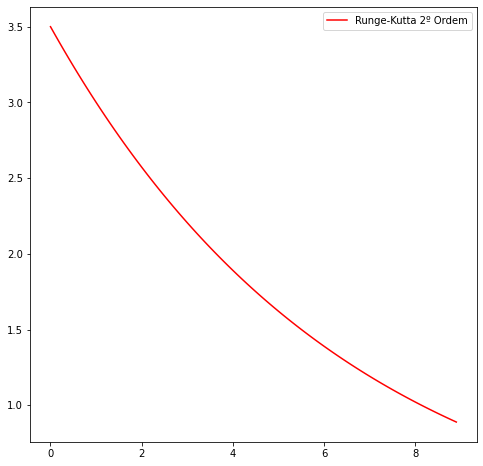

In [49]:
ax,fig = plt.subplots(figsize=(8,8))
plt.plot(tempo_rk,massa_rk,'r-', label = 'Runge-Kutta 2º Ordem')
plt.legend()
plt.show()


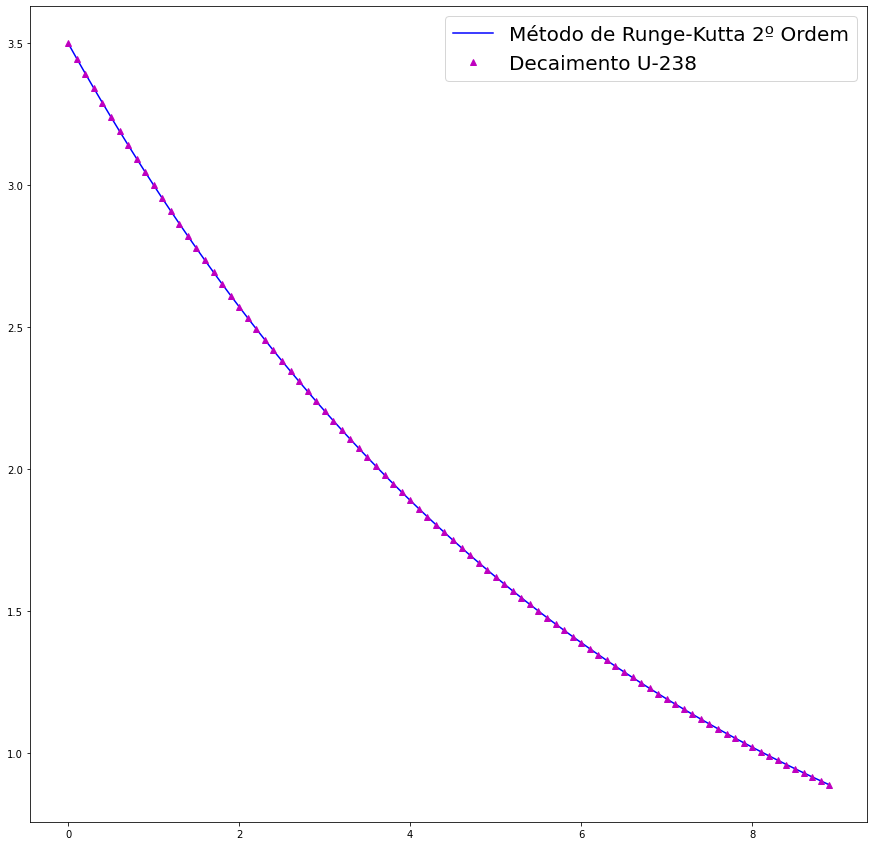

In [45]:
ax,fig = plt.subplots(figsize=(15,15))
plt.plot(tempo_rk,massa_rk,'b-', label = 'Método de Runge-Kutta 2º Ordem')
plt.plot(tempo,massa,'m^',alpha=1, label = 'Decaimento U-238')
plt.legend(fontsize = 20)
#plt.plot(t_numerica,N_numerica,'o-',alpha=1)
plt.show()

# Análise dos ERROS:

In [53]:
Erro_MDFC_MA = ((N_numerica-massa)/massa)

In [54]:
Erro_MDFC_MA

array([ 0.00000000e+00, -1.19804481e-04,  4.98357287e-06, -1.22471419e-04,
        1.02064445e-05, -1.25385138e-04,  1.56838189e-05, -1.28561318e-04,
        2.14318657e-05, -1.32016633e-04,  2.74677824e-05, -1.35768818e-04,
        3.38098587e-05, -1.39836737e-04,  4.04775465e-05, -1.44240449e-04,
        4.74915338e-05, -1.49001290e-04,  5.48738227e-05, -1.54141948e-04,
        6.26478133e-05, -1.59686558e-04,  7.08383926e-05, -1.65660783e-04,
        7.94720287e-05, -1.72091920e-04,  8.85768713e-05, -1.79009000e-04,
        9.81828587e-05, -1.86442896e-04,  1.08321831e-04, -1.94426446e-04,
        1.19027653e-04, -2.02994572e-04,  1.30336337e-04, -2.12184414e-04,
        1.42286189e-04, -2.22035476e-04,  1.54917944e-04, -2.32589766e-04,
        1.68274928e-04, -2.43891967e-04,  1.82403217e-04, -2.55989596e-04,
        1.97351819e-04, -2.68933192e-04,  2.13172851e-04, -2.82776503e-04,
        2.29921743e-04, -2.97576695e-04,  2.47657448e-04, -3.13394562e-04,
        2.66442664e-04, -

# Gráfico de Erro do Método das Diferenças Finitas Centradas:

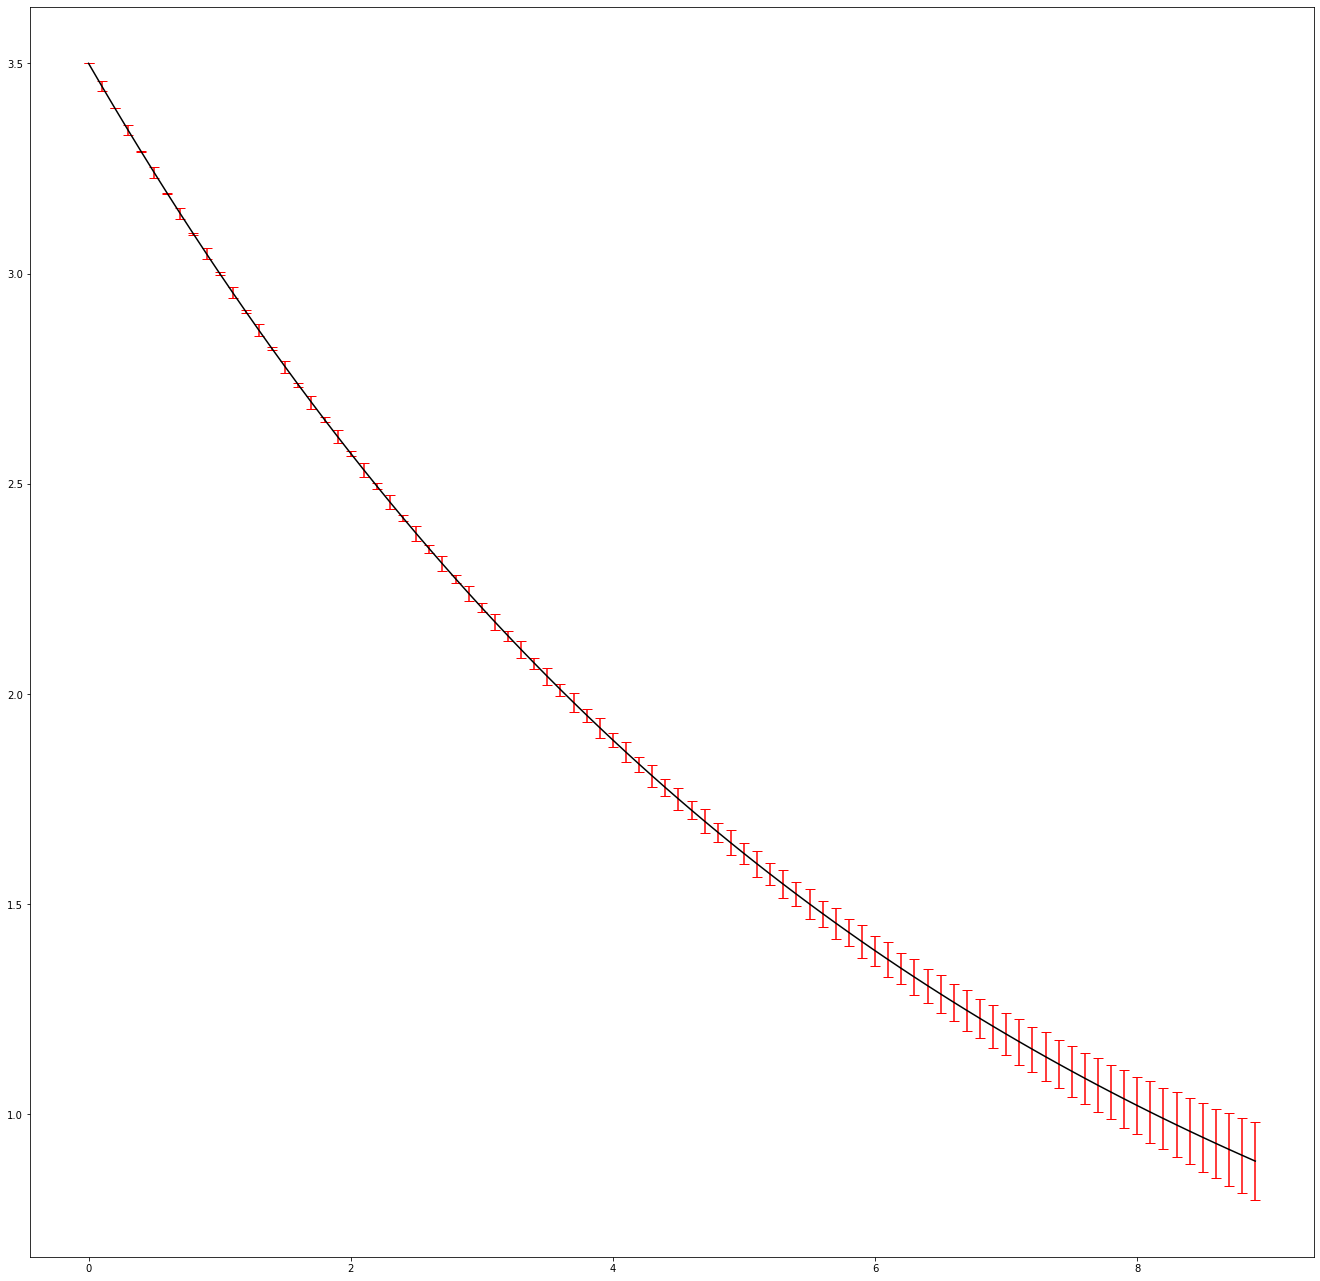

In [65]:
Erro_MDFC_MA = ((N_numerica-massa)/massa)*100
ax,fig = plt.subplots(figsize=(23,23))
plt.errorbar(tempo,massa,yerr = Erro_MDFC_MA,ecolor='red',capsize=5,color='black')
plt.show()

# Gráfico de Erro do Método de Runge-Kutta 2º

In [66]:
Erro_MRK_MA = ((massa_rk-massa)/massa)

In [67]:
Erro_MRK_MA

array([0.00000000e+00, 6.15784769e-07, 1.23156992e-06, 1.84735545e-06,
       2.46314135e-06, 3.07892764e-06, 3.69471430e-06, 4.31050135e-06,
       4.92628877e-06, 5.54207657e-06, 6.15786476e-06, 6.77365332e-06,
       7.38944226e-06, 8.00523158e-06, 8.62102128e-06, 9.23681135e-06,
       9.85260181e-06, 1.04683926e-05, 1.10841839e-05, 1.16999755e-05,
       1.23157674e-05, 1.29315598e-05, 1.35473525e-05, 1.41631456e-05,
       1.47789391e-05, 1.53947330e-05, 1.60105272e-05, 1.66263219e-05,
       1.72421169e-05, 1.78579123e-05, 1.84737080e-05, 1.90895042e-05,
       1.97053007e-05, 2.03210976e-05, 2.09368949e-05, 2.15526925e-05,
       2.21684906e-05, 2.27842890e-05, 2.34000878e-05, 2.40158870e-05,
       2.46316865e-05, 2.52474865e-05, 2.58632868e-05, 2.64790875e-05,
       2.70948886e-05, 2.77106900e-05, 2.83264919e-05, 2.89422941e-05,
       2.95580967e-05, 3.01738996e-05, 3.07897030e-05, 3.14055067e-05,
       3.20213108e-05, 3.26371153e-05, 3.32529202e-05, 3.38687254e-05,
      

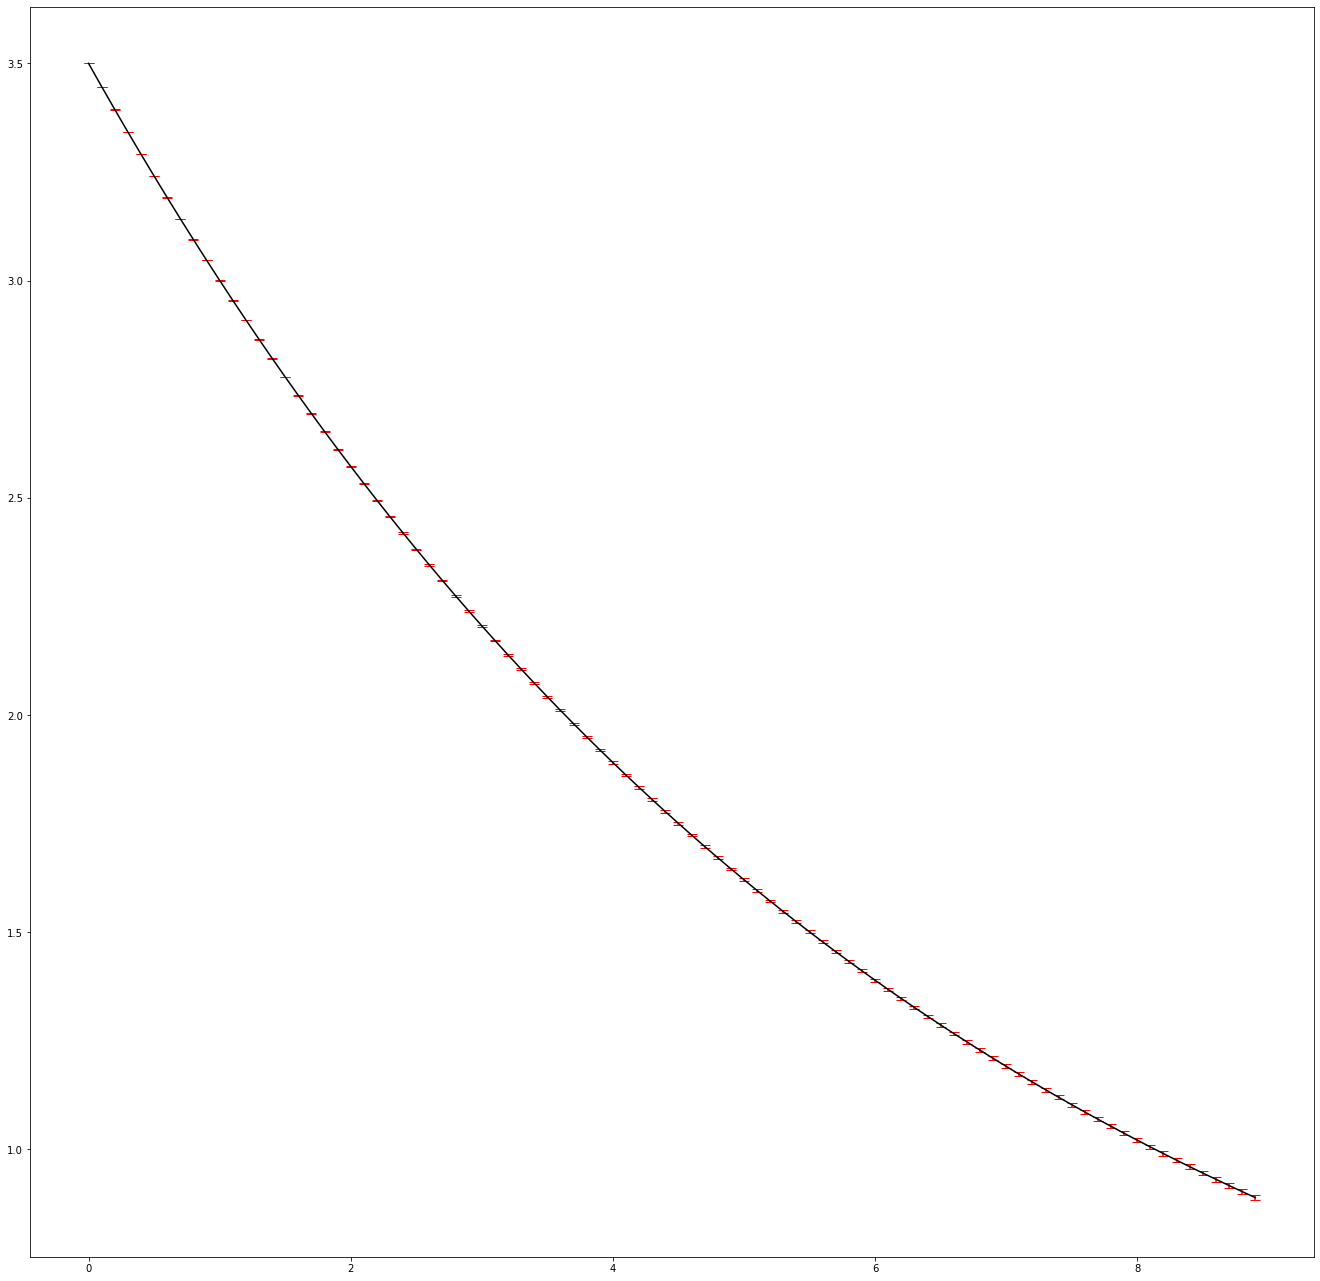

In [68]:
Erro_MRK_MA = ((massa_rk-massa)/massa)*100
ax,fig = plt.subplots(figsize=(23,23)) 
plt.errorbar(tempo,massa,yerr=Erro_MRK_MA,ecolor='r',capsize=5,color='black')
plt.show()

# Gráfico de Erro do Método das Diferenças Finitas Avançadas

In [69]:
Erro_ME_MA = ((N_euler-massa)/massa)*100

<ErrorbarContainer object of 3 artists>

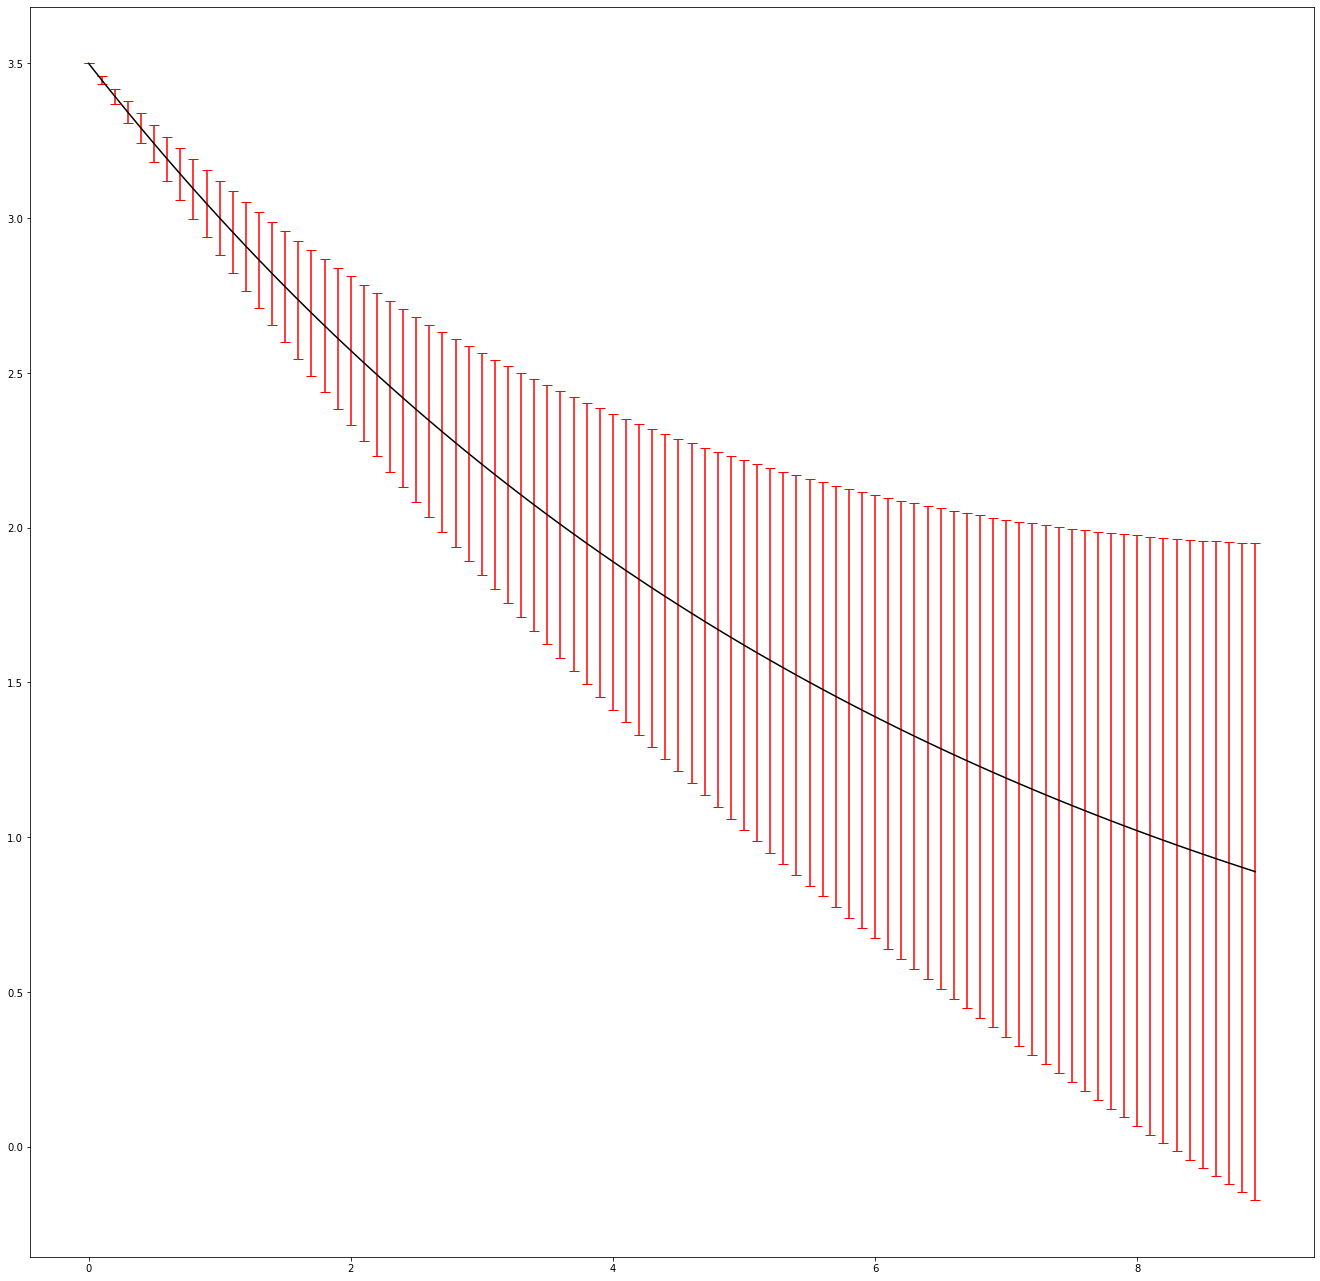

In [70]:
ax,fig = plt.subplots(figsize=(23,23))
plt.errorbar(tempo,massa,yerr=Erro_ME_MA,ecolor='red',capsize=5,color='black')

# FIM!! 

# TESTE DE FUNÇÃO PARA VALIDAR O MÉTODO DAS DIFERENÇAS FINITAS

In [150]:
#TESTANDO UMA FUNÇÃO PELO MÉTODO DAS DIFERENÇAS FINITAS CENTRADAS

x = np.array([0,0.1])
#Já temos dois valores de x, já que só podemos começar o Método das DFC a partir de k=2.

#imprimir os valores de x
x

array([0. , 0.1])

In [151]:
y = np.array([0,0.1])
#Temos uma condição inicial de y = para x = 0
#Encontramos o segundo valor de y pelo Método de Euler

#imprimir os valores de x
y

array([0. , 0.1])

In [152]:
h = 0.1 #passo considerado

In [153]:
#Criamos uma iteração para os valores de x:
#O intervalo do range vai de 0 a 9, pois já temos dois valores no array de x e precisamos de mais oito valores
#TOME NOTA: range(valor_inicial-includente, valor_final-excludente).Logo só vai de 0 a 8.
for i in range(0,9):
    h+=0.1
    
    x = np.append(x,h)

In [154]:
#Criamos uma iteração para os valores de y:


for i in range(1,10):
    d_finitas_centradas = y[i-1]+2*0.1*(1/(1+x[i]*x[i])-2*y[i]*y[i])
    y = np.append(y,d_finitas_centradas)
    


In [155]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [156]:
y

array([0.        , 0.1       , 0.1940198 , 0.27725022, 0.34675897,
       0.4015673 , 0.44225645, 0.47038982, 0.487978  , 0.49709202,
       0.49963505])

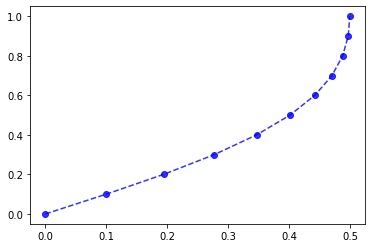

In [157]:
plt.plot(y,x,'bo-',markersize =6, alpha =0.8, linestyle='dashed')
plt.show()

# Comparando com o Método de Euler

In [158]:
#PVI:   
h = 0.1
ye = np.array([0])  
xe = np.array([0])

In [159]:
for i in range(0,10):
    function = (1/(1+pow(xe[i],2)))-2*pow(ye[i],2)
    passo = xe[i] + h
    xe = np.append(xe,passo)
    euler = ye[i] + h*function
    ye = np.append(ye,euler)

    

In [160]:
xe

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [161]:
ye

array([0.        , 0.1       , 0.1970099 , 0.28540117, 0.36085352,
       0.42101736, 0.46556624, 0.49574527, 0.51370669, 0.52190338,
       0.52267538])

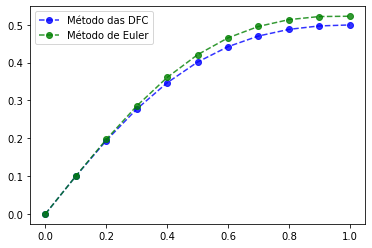

In [162]:

plt.plot(x,y,'bo-',markersize =6, alpha =0.8, linestyle='dashed',label='Método das DFC')
plt.plot(xe,ye,'go-',markersize =6, alpha = 0.8,linestyle='dashed',label='Método de Euler')
plt.legend()
plt.show()

# FIM